<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Principal_Component_Analysis_and_Diagnosis_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Breast cancer**

**Install Pycaret**

In [1]:
!pip install pycaret==3.0.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 1.4 MB/s et

**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification.
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [4]:
from google.colab import files
uploaded = files.upload()

Saving column_2C.csv to column_2C.csv


In [5]:
#read cvs file into dataframe
df = pd.read_csv('/content/column_2C.csv')
df.head(25)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [6]:
len(df.index)

310

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

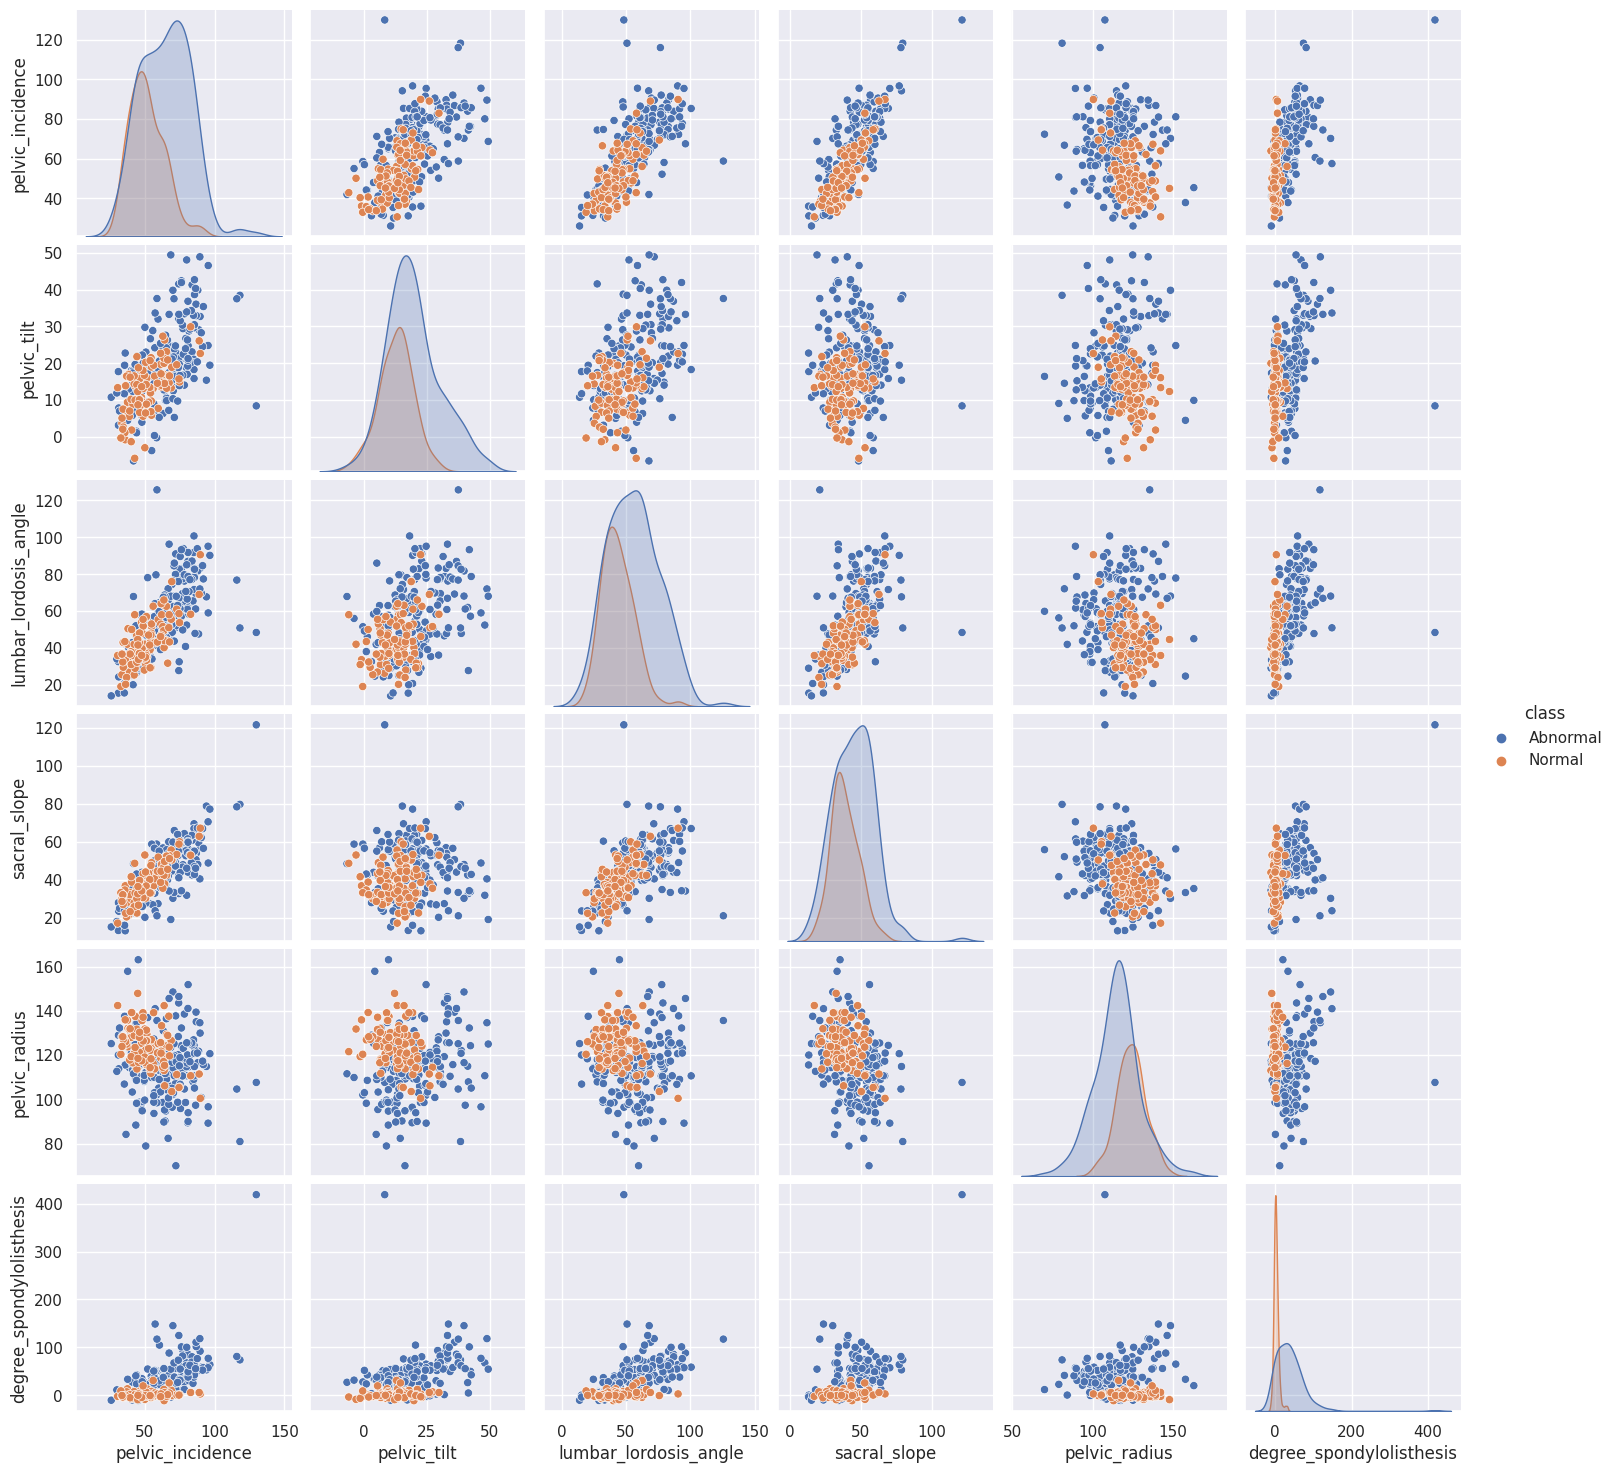

In [11]:
sns.pairplot(df, hue='class')
plt.show()

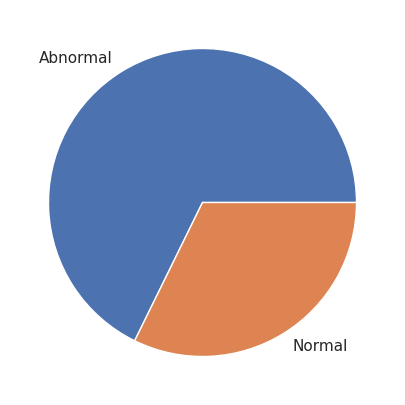

In [12]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [13]:
X = df.drop(columns=['class'])
X.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437


In [14]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695889,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467675,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767933,41.287352,418.543082


**Standardize the Data**

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
5,-1.176524,-0.362375,-1.447086,-1.240579,0.933162,-0.641789
6,-0.410474,-0.167980,-0.797069,-0.401840,0.199074,-0.541574
7,-0.879201,-0.679253,-1.235826,-0.622522,-0.048932,-0.985977
8,-0.970815,-0.401221,-0.498816,-0.947465,0.532664,-0.346886
9,-1.383620,-1.254175,-0.538875,-0.841579,-2.533058,-0.683556


In [16]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,1.031433e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
pelvic_tilt,310.0,-4.584147e-17,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
lumbar_lordosis_angle,310.0,-2.979695e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
sacral_slope,310.0,-6.876220e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
pelvic_radius,310.0,3.495412e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
degree_spondylolisthesis,310.0,-6.876220e-17,1.001617,-0.996173,-0.658507,-0.387450,0.399768,10.460350


**Observations and variables**

In [17]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

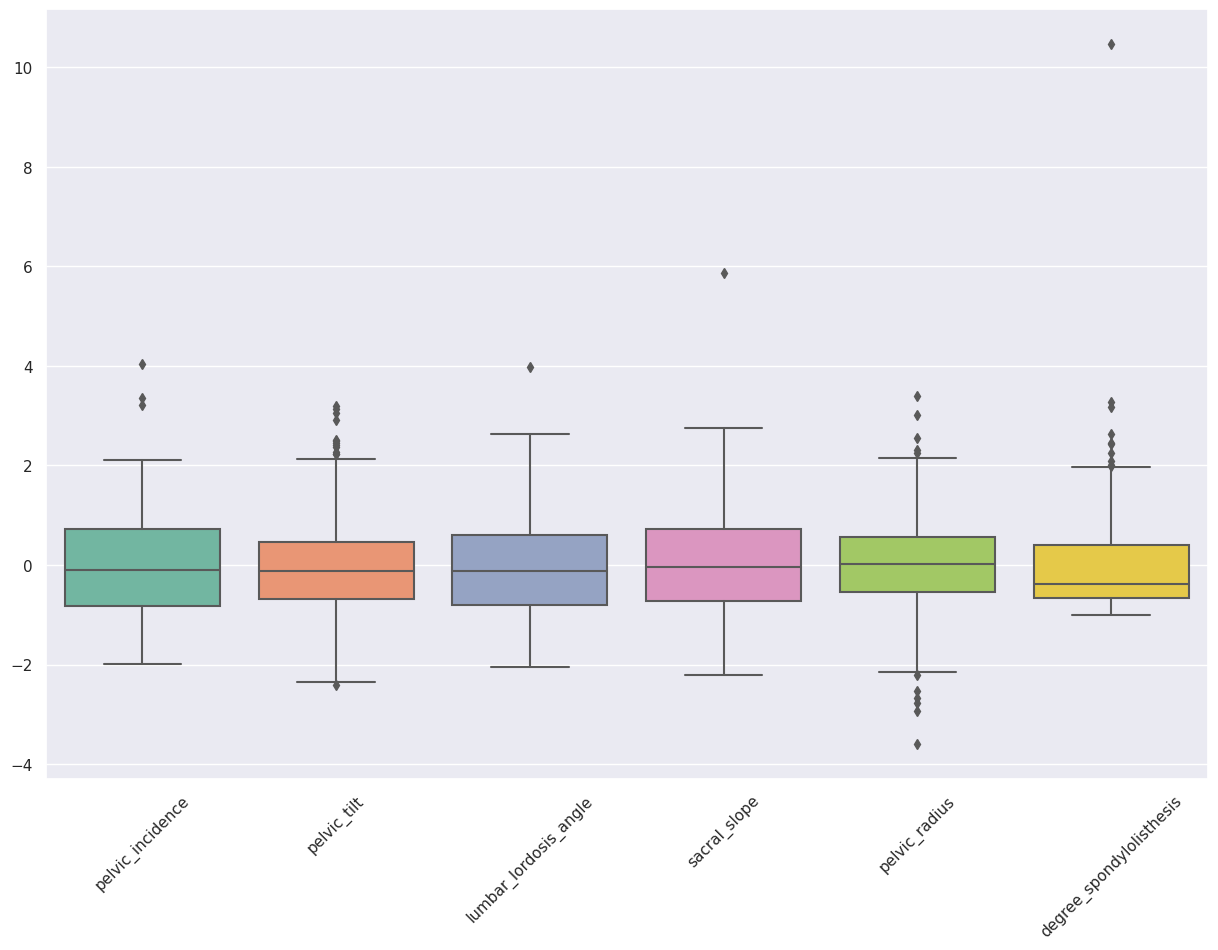

In [18]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


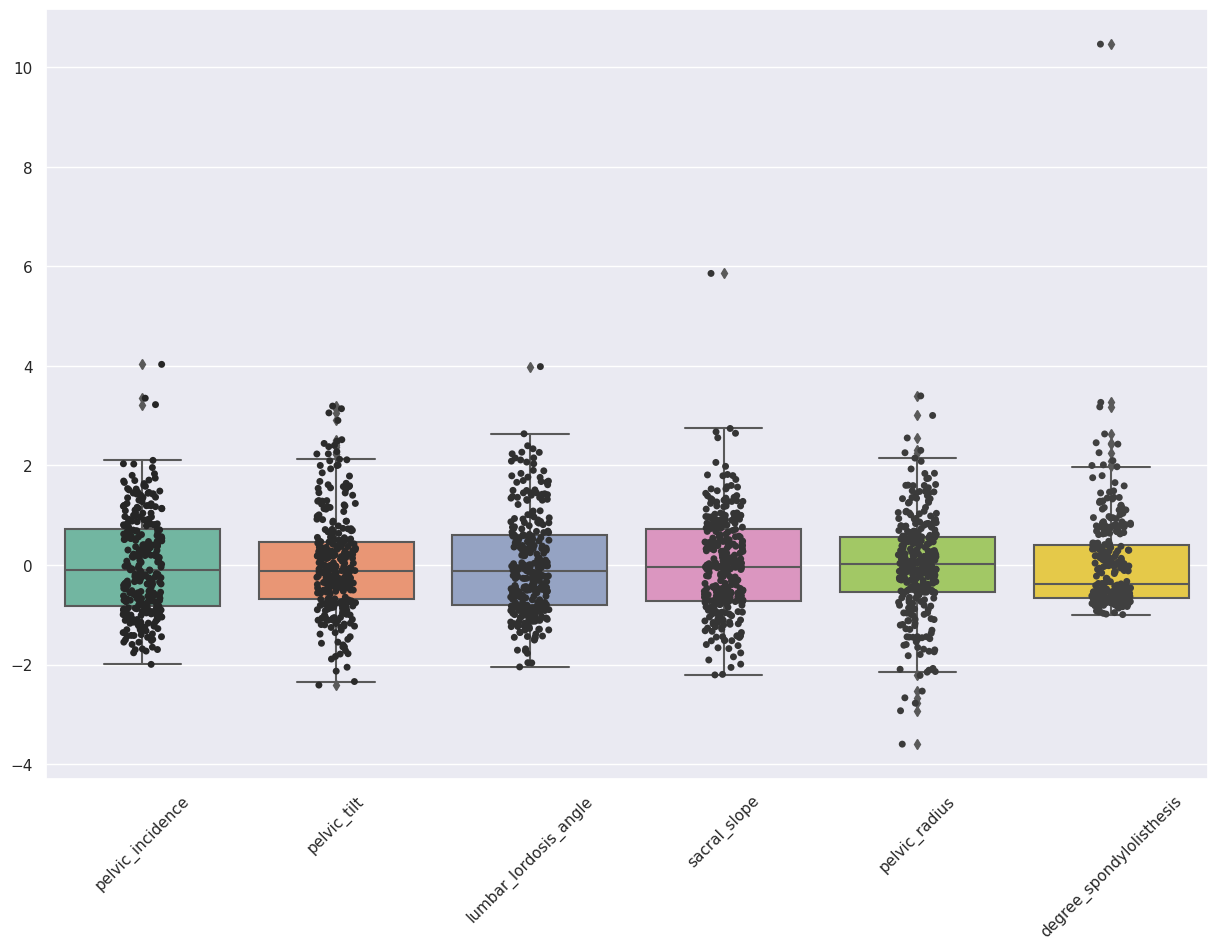

In [19]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

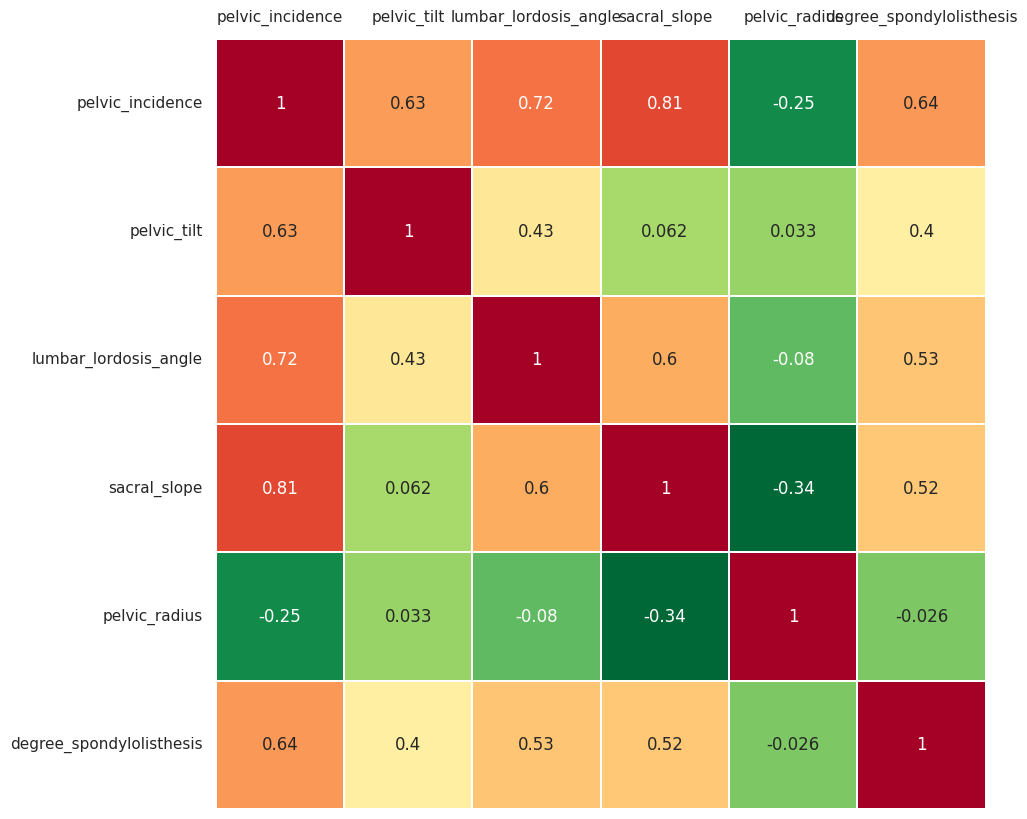

In [20]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, 'Z2')

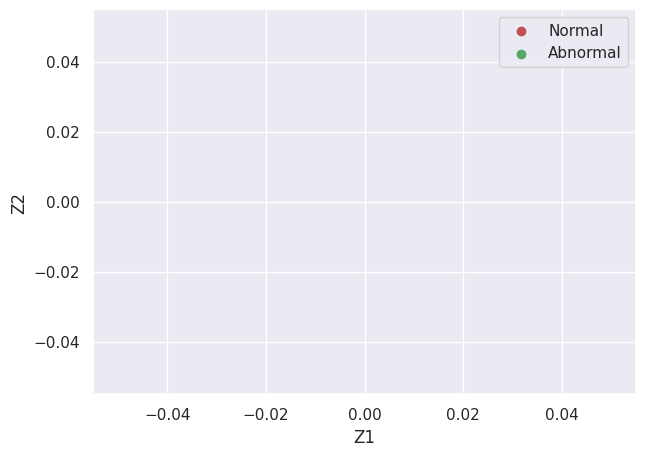

In [25]:
pca = PCA()
Z = pca.fit_transform(X)

# Normal->0,  Abnormal->1
idx_Normal = np.where(y == 0)
idx_Abnormal = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Normal,0], Z[idx_Normal,1], c='r', label='Normal')
plt.scatter(Z[idx_Abnormal,0], Z[idx_Abnormal,1], c='g', label='Abnormal')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

array([[ 5.35141704e-01, -2.19368167e-03, -9.60691024e-02,
        -1.02798970e-01, -4.23458331e-01,  7.17289820e-01],
       [ 3.23584609e-01,  5.27545436e-01, -6.48700762e-01,
        -6.44118188e-03, -1.50562386e-01, -4.16492034e-01],
       [ 4.57969569e-01,  9.28751334e-02,  1.52338408e-01,
        -5.48099706e-01,  6.76770128e-01,  3.92228634e-10],
       [ 4.45905809e-01, -3.96157337e-01,  3.60312717e-01,
        -1.27200929e-01, -4.31500108e-01, -5.58596187e-01],
       [-1.43496673e-01,  7.27755637e-01,  5.85990591e-01,
        -1.74212978e-01, -2.75763129e-01, -1.04839466e-09],
       [ 4.23977529e-01,  1.62776863e-01,  2.71184129e-01,
         8.01528139e-01,  2.78852215e-01,  1.22537460e-10]])

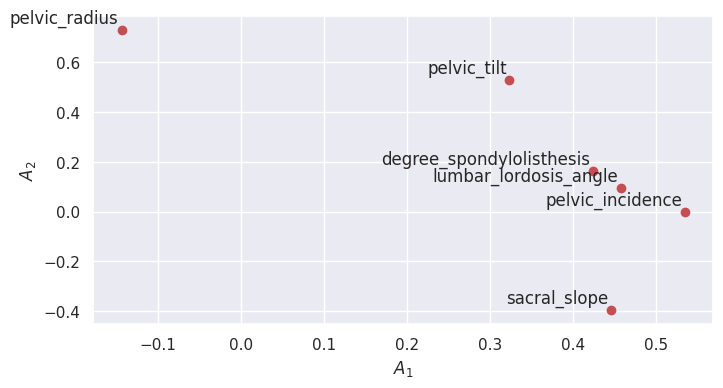

In [26]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


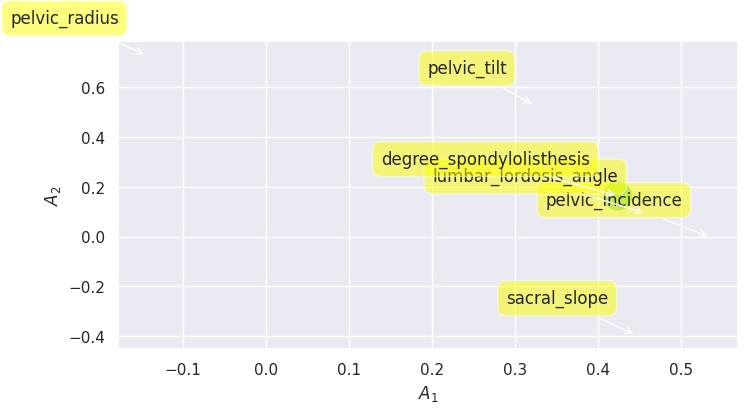

In [27]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([3.25628543e+00, 1.19844855e+00, 7.63553591e-01, 4.74057198e-01,
       3.27072712e-01, 4.35517805e-16])

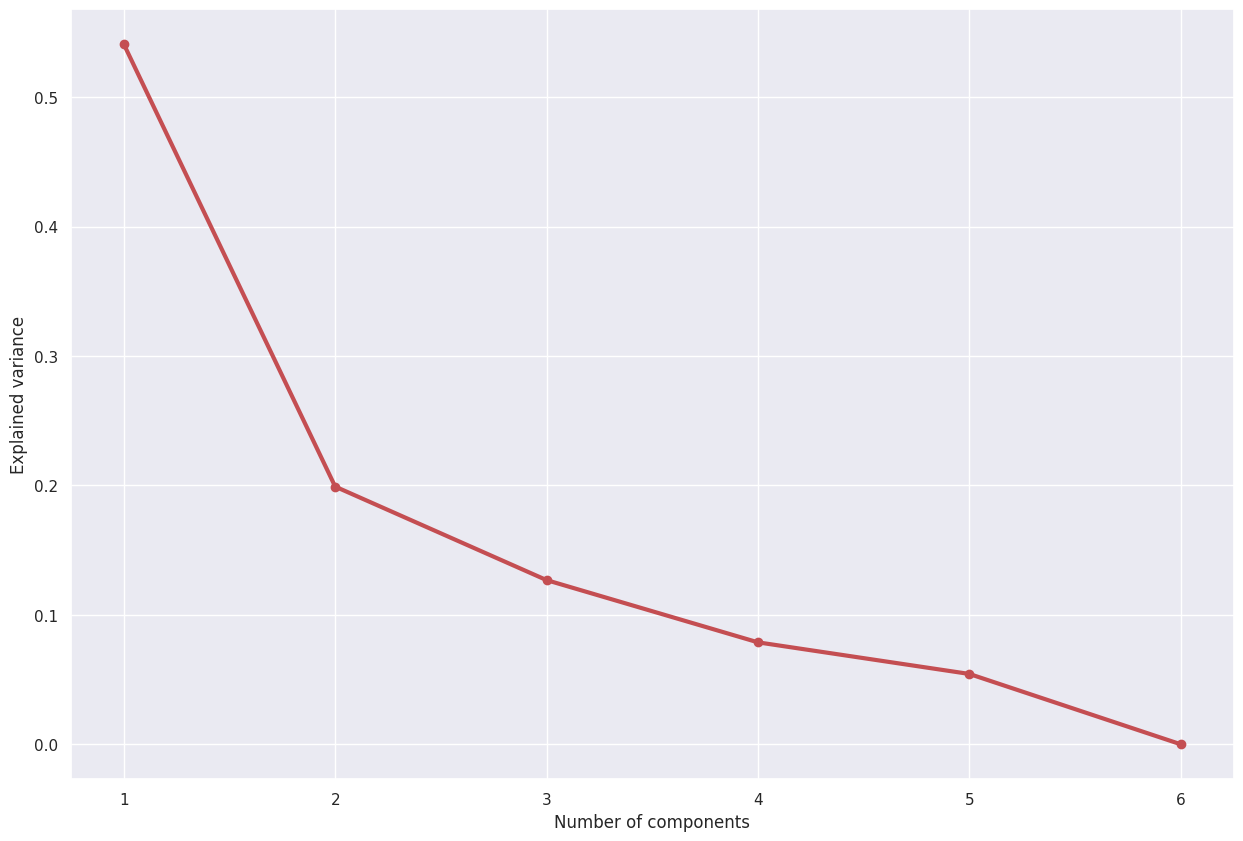

In [28]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

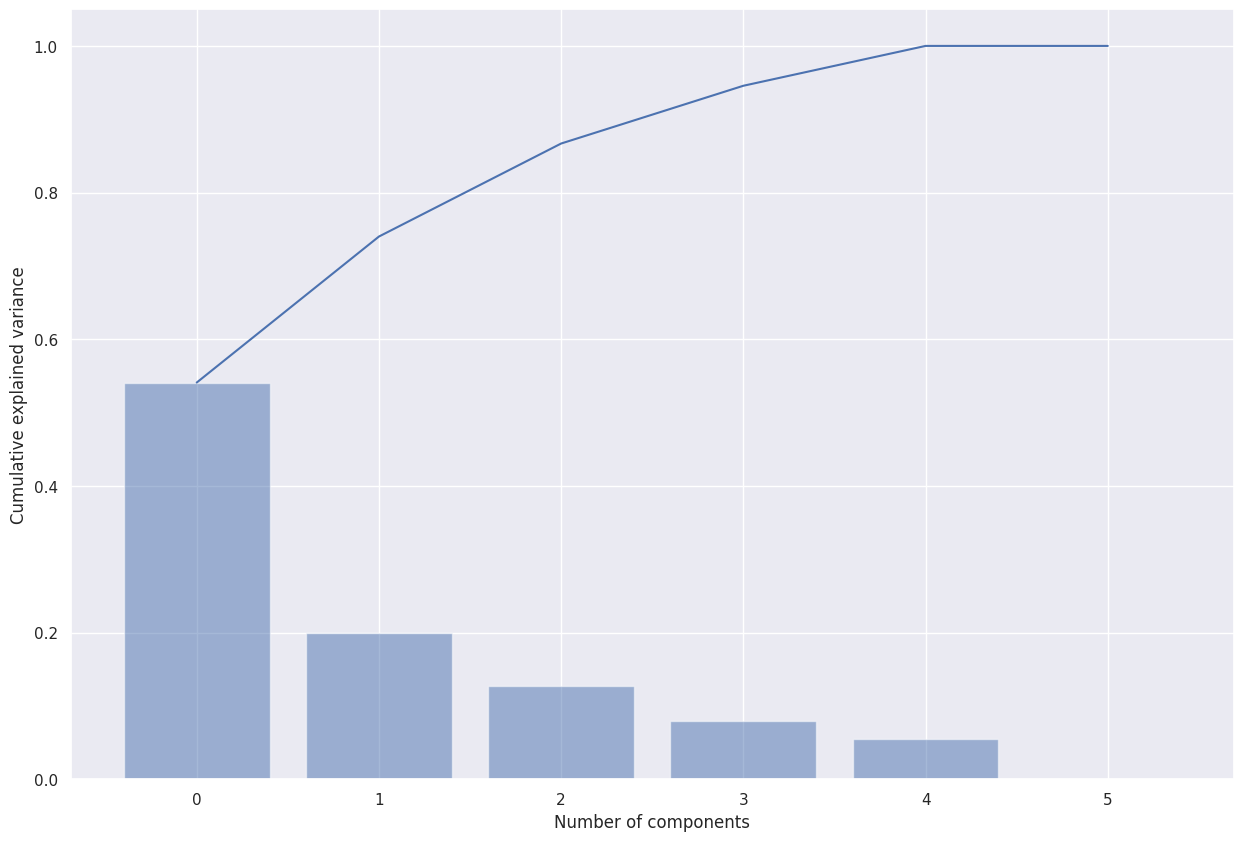

In [29]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-8.93125658e-01, -4.01364216e-01, -6.54381852e-01, -6.58015146e-01,
       -1.06164934e+00,  7.43123703e-01,  5.41693021e-02, -4.20673233e-01,
        4.50669443e-01, -2.32996429e+00, -8.09335857e-01,  7.05262328e-01,
        4.82142420e-01, -1.12718453e-01,  4.67425053e-01,  2.37184132e-01,
       -2.77728998e-01,  9.32545306e-02,  3.83510780e-01, -1.80376350e-01,
        9.63441880e-01,  7.02186818e-01, -1.75170090e-01, -1.65352467e-01,
        7.81649465e-01,  9.41694610e-01,  5.11577476e-01, -1.56198480e-01,
        2.31284476e-01,  3.63853147e-02, -3.16611579e-01, -1.34718137e+00,
        2.46005324e-01,  4.93501512e-01,  1.15973462e+00, -3.96320838e-01,
        5.93104521e-01,  1.69460850e+00,  1.24104787e+00,  9.89653018e-02,
       -6.51193837e-01, -6.89693595e-01,  3.54423136e-01,  5.92383199e-01,
       -2.55642026e-01,  5.58101339e-01,  5.52650857e-01, -5.98437533e-03,
        5.88140137e-01,  3.44494785e-01,  9.28461879e-02,  8.04270911e-01,
        1.71070325e+00, -

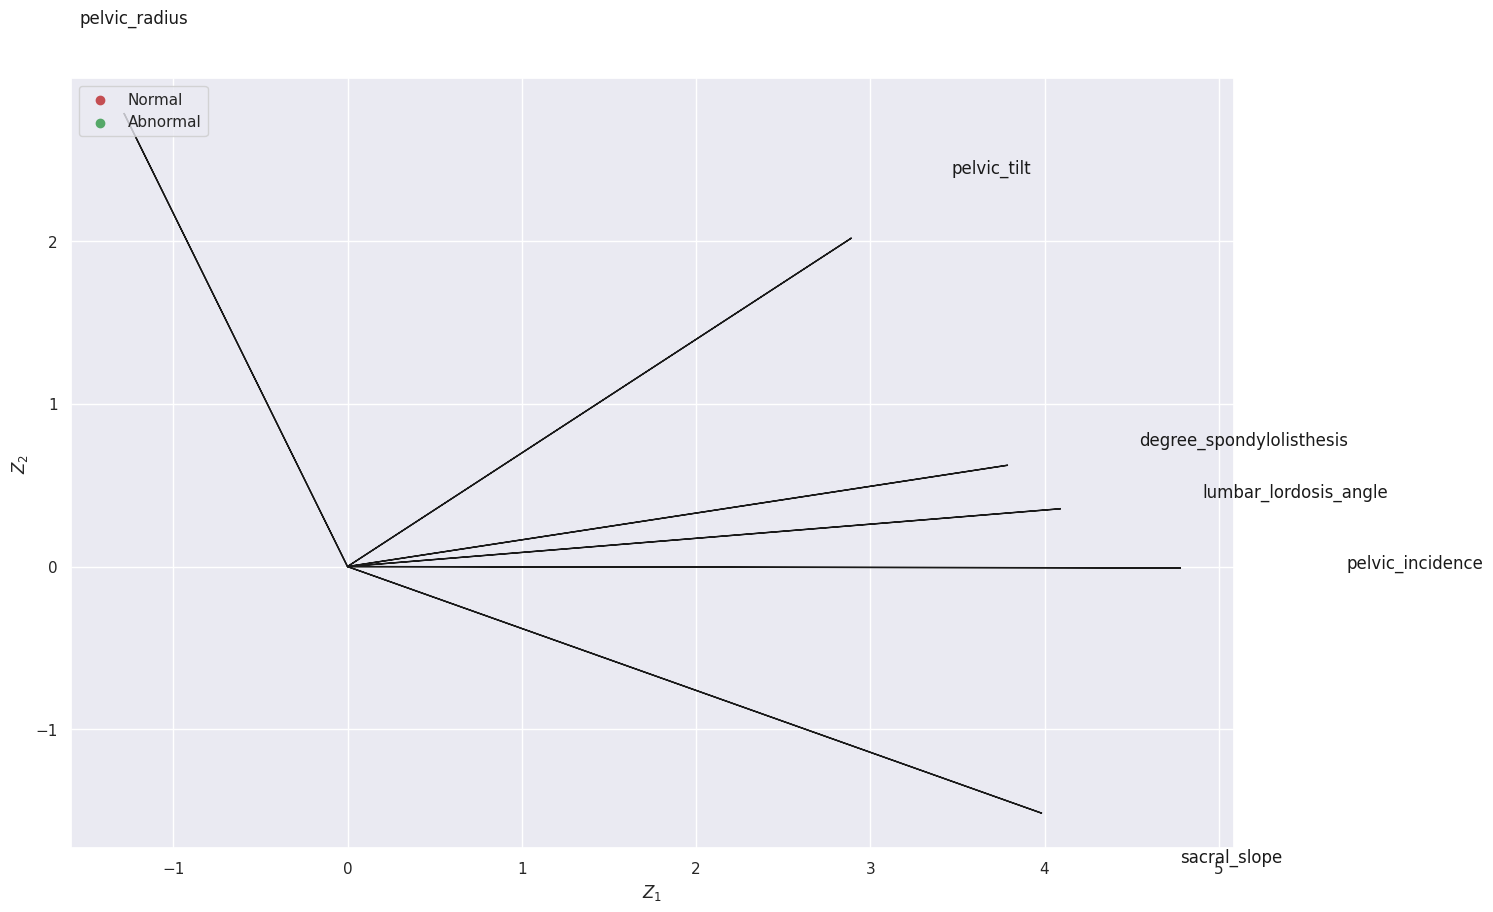

In [31]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Normal,0], Z[idx_Normal,1], c='r', label='Normal')
plt.scatter(Z[idx_Abnormal,0], Z[idx_Abnormal,1], c='g', label='Abnormal')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [32]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.7 MB/s eta 0:00:00


In [33]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [34]:
out['PC']

,PC1,PC2,PC3,PC4,PC5
0,-0.238623,-0.893126,-1.547663,0.054429,-0.306374
1,-2.246635,-0.401364,-0.303298,0.643297,0.017674
2,0.278507,-0.654382,-1.008548,-0.514302,-0.434832
3,0.374460,-0.658015,-1.344500,0.040140,-0.435742
4,-1.373478,-1.061649,-0.262206,0.530596,-0.319709
...,...,...,...,...,...
305,-1.541223,-0.187743,-0.280505,-0.015266,-0.151272
306,-1.250275,0.032120,-0.968230,0.277025,-0.527580
307,-0.497436,0.665527,-0.368328,-0.520184,-0.552595
308,-1.530852,-0.407145,0.241547,-0.102060,0.129363


**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (54.0% expl.var)', ylabel='PC2 (19.9% expl.var)'>)

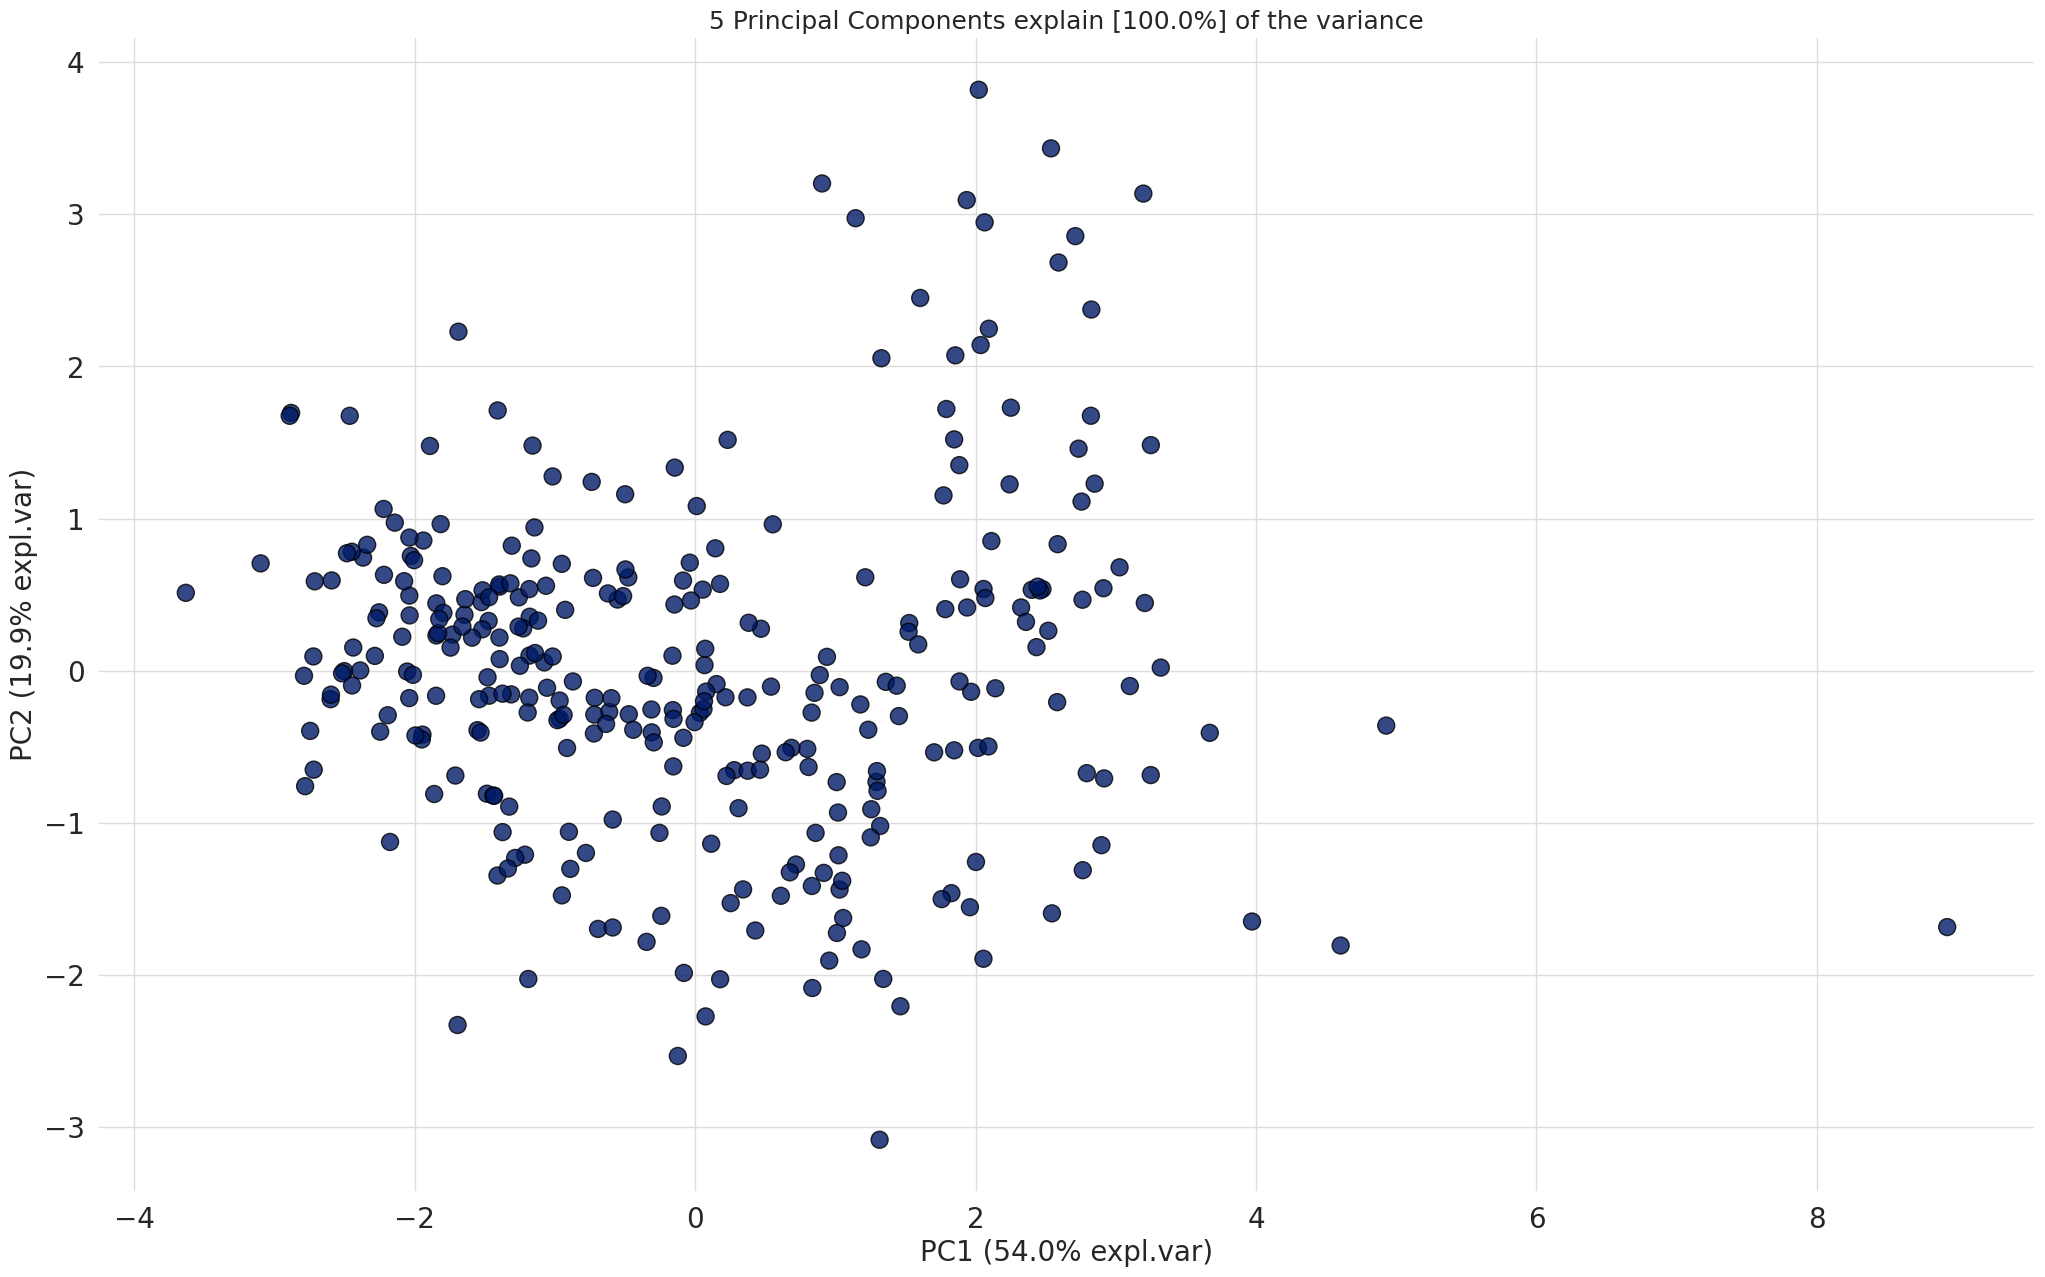

In [35]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [36]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4,PC5
pelvic_incidence,0.535142,-0.002194,-0.096069,-0.102799,-0.423458
pelvic_tilt,0.323585,0.527545,-0.648701,-0.006441,-0.150562
lumbar_lordosis_angle,0.457970,0.092875,0.152338,-0.548100,0.676770
sacral_slope,0.445906,-0.396157,0.360313,-0.127201,-0.431500
pelvic_radius,-0.143497,0.727756,0.585991,-0.174213,-0.275763
degree_spondylolisthesis,0.423978,0.162777,0.271184,0.801528,0.278852


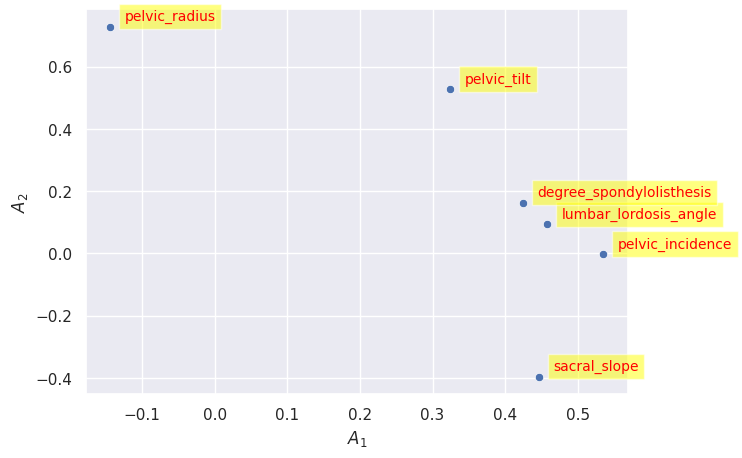

In [37]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

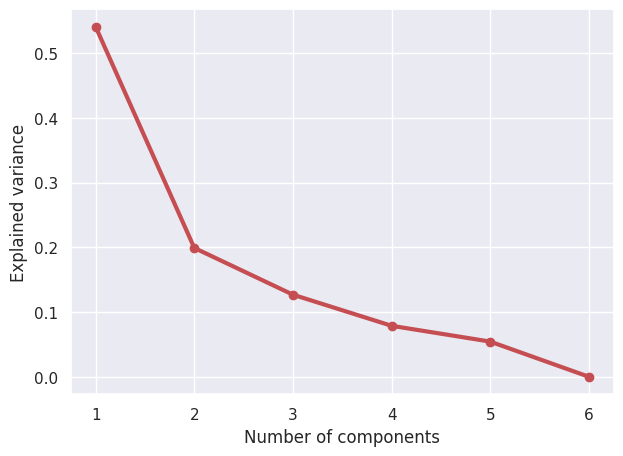

In [38]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

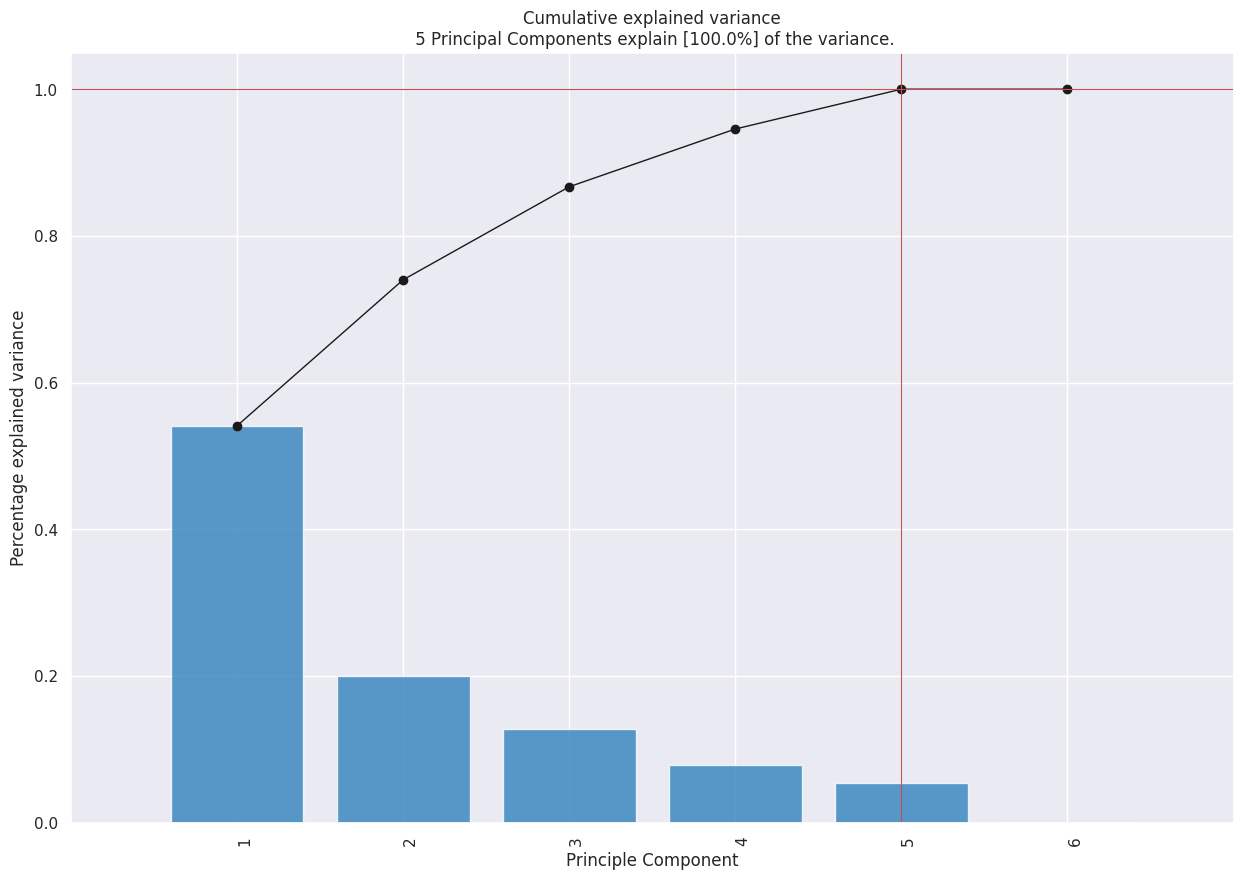

In [39]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (54.0% expl.var)', ylabel='PC2 (19.9% expl.var)'>)

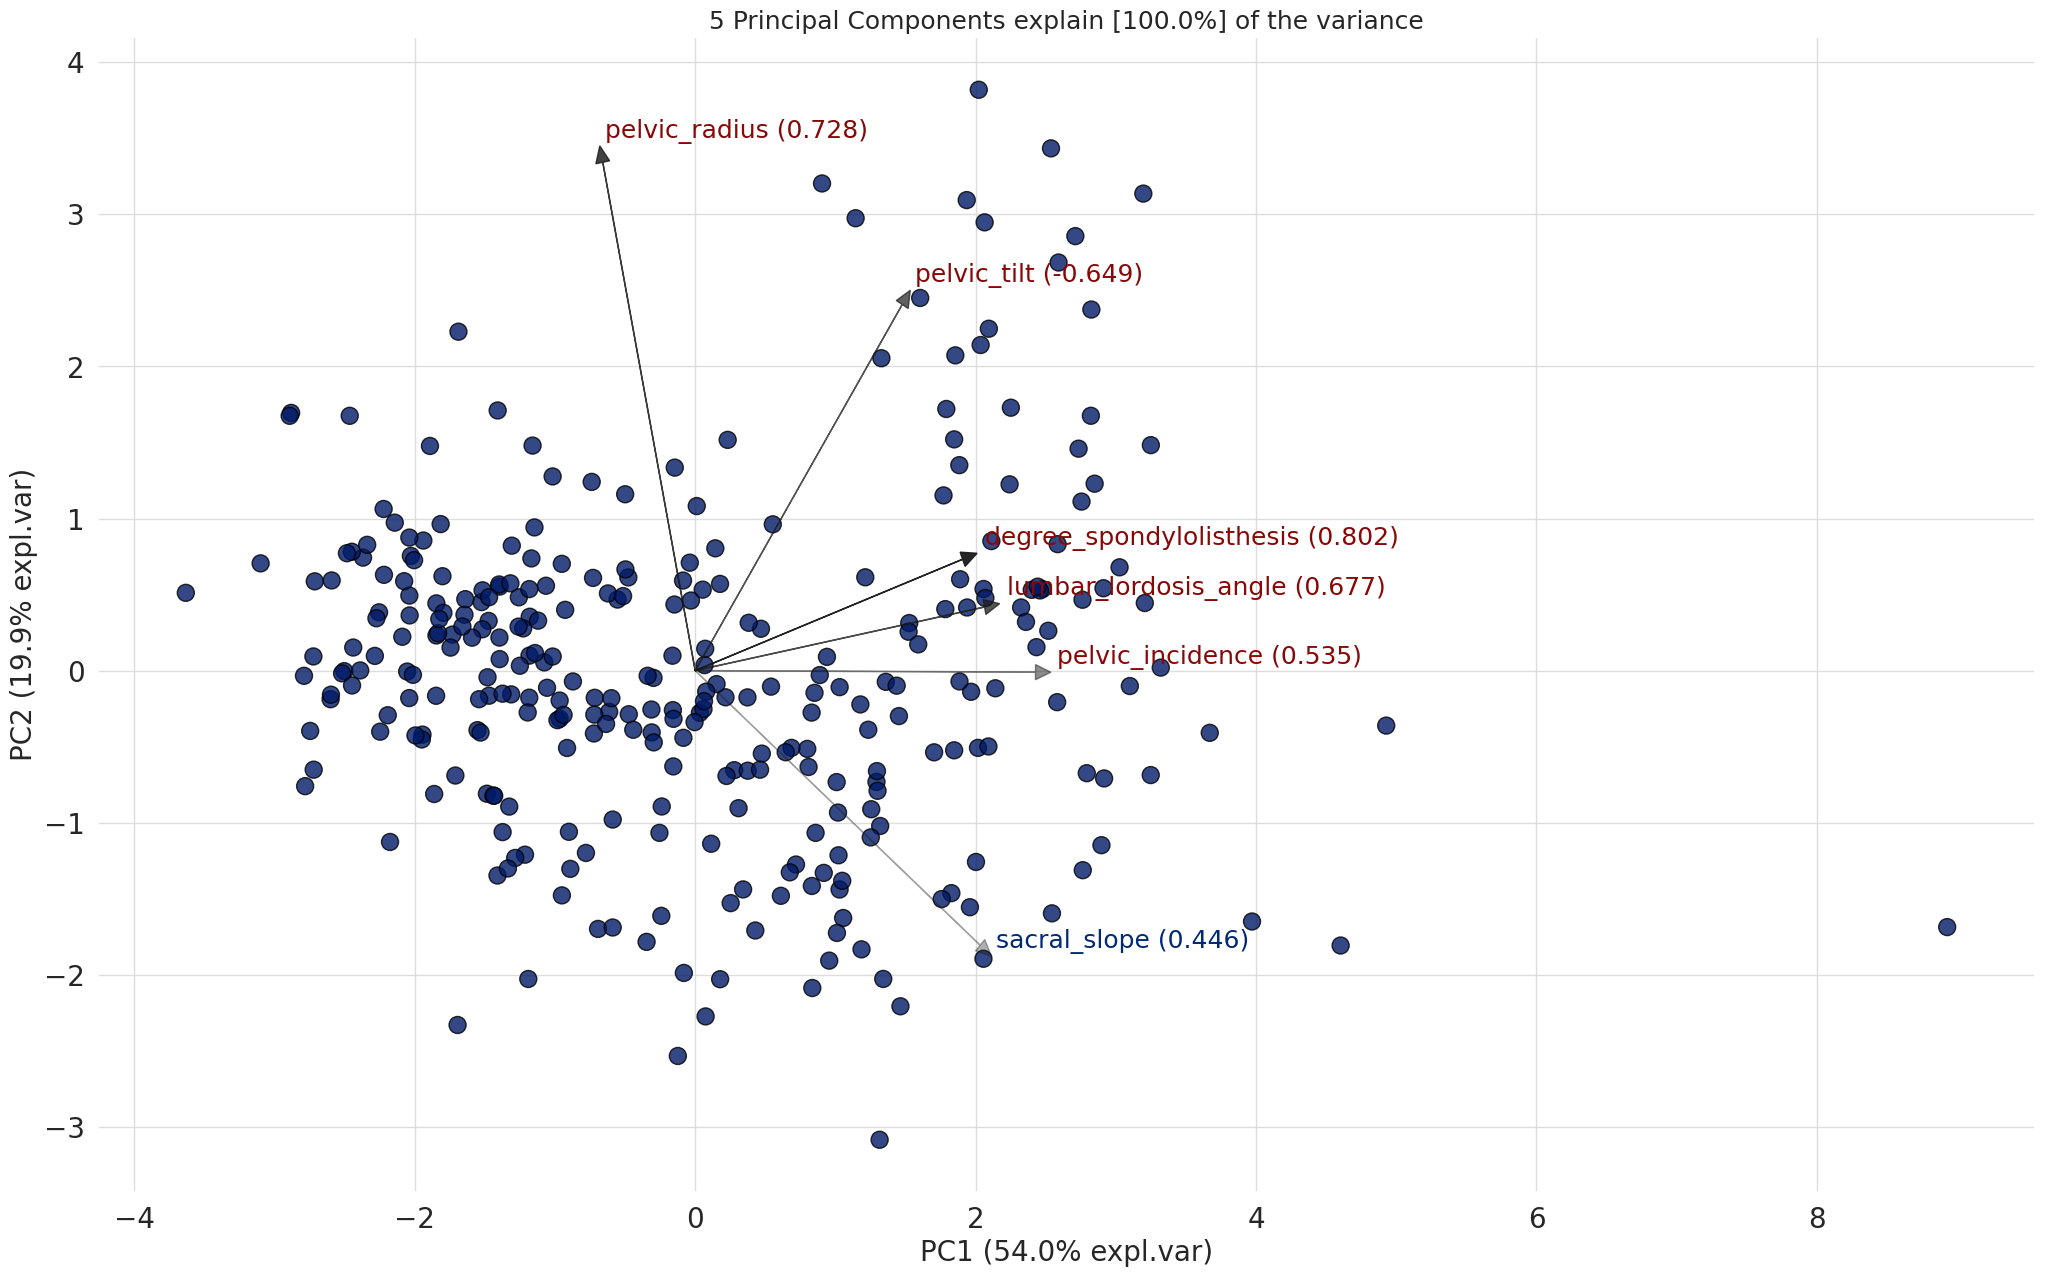

In [40]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (54.0% expl.var)', ylabel='PC2 (19.9% expl.var)', zlabel='PC3 (12.6% expl.var)'>)

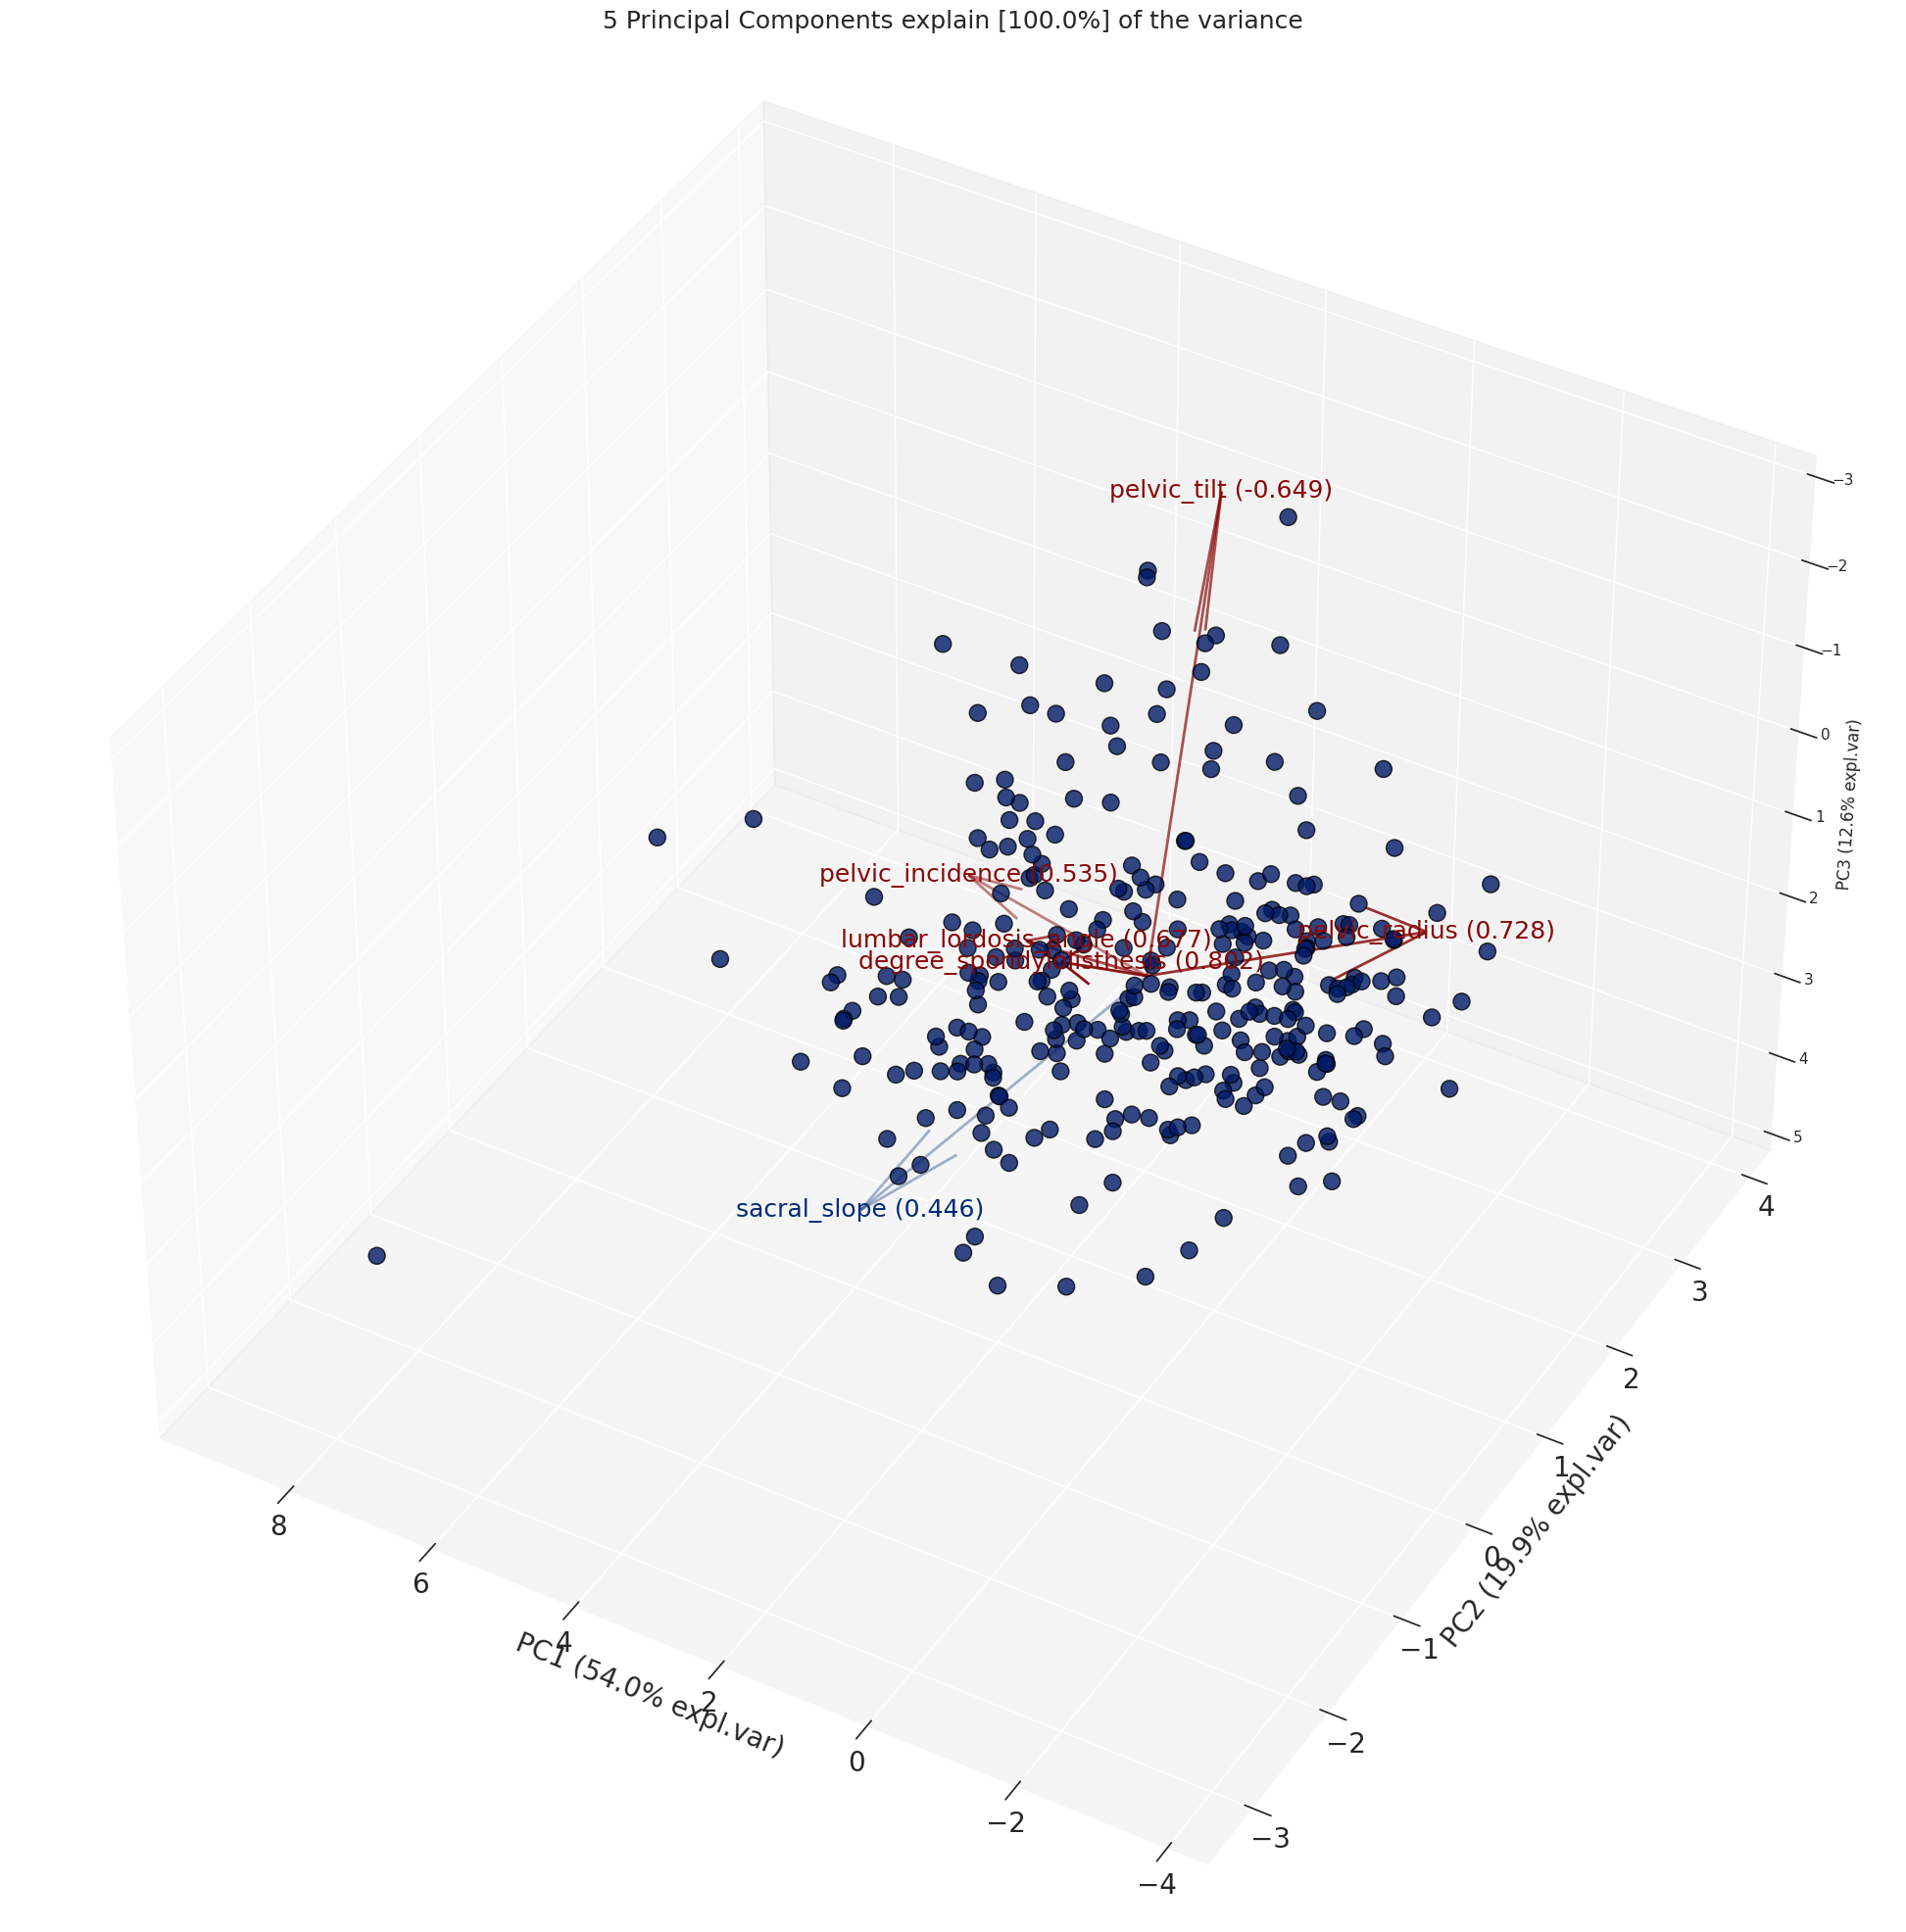

In [41]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [42]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [47]:
def enable_colab():
  """Enables PyCaret to run on Google Colab."""

  # Import the necessary modules.
  import pycaret
  from pycaret.utils import _colab_setup

  # Set the current working directory to the Colab notebook directory.
  pycaret.utils.set_current_dir()

  # Set up the Colab environment.
  _colab_setup()

#from pycaret.utils import enable_colab
#enable_colab()

In [51]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (279, 7)
Unseen Data For Predictions: (31, 7)


In [52]:
clf = setup(data=data, target='class', train_size=0.7, session_id=666)

,Description,Value
0,Session id,666
1,Target,class
2,Target type,Binary
3,Target mapping,"Abnormal: 0, Normal: 1"
4,Original data shape,"(279, 7)"
5,Transformed data shape,"(279, 7)"
6,Transformed train set shape,"(195, 7)"
7,Transformed test set shape,"(84, 7)"
8,Numeric features,6
9,Preprocess,True


**Comparing All Models**

In [53]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8411,0.8947,0.8000,0.7277,0.7489,0.6369,0.6504,0.1040
rf,Random Forest Classifier,0.8305,0.9172,0.7133,0.7542,0.7082,0.5938,0.6136,0.3770
gbc,Gradient Boosting Classifier,0.8305,0.9115,0.7500,0.7355,0.7221,0.6055,0.6242,0.3870
lda,Linear Discriminant Analysis,0.8305,0.8992,0.6600,0.7894,0.6993,0.5843,0.6032,0.0560
ada,Ada Boost Classifier,0.8300,0.9010,0.7500,0.7485,0.7234,0.6067,0.6290,0.2210
dt,Decision Tree Classifier,0.8258,0.7988,0.7300,0.7425,0.7153,0.5936,0.6105,0.0580
ridge,Ridge Classifier,0.8255,0.0000,0.6267,0.7956,0.6771,0.5627,0.5857,0.0430
lightgbm,Light Gradient Boosting Machine,0.8250,0.8981,0.7467,0.7313,0.7135,0.5939,0.6124,0.2370
lr,Logistic Regression,0.8211,0.9175,0.7133,0.7427,0.7005,0.5767,0.5980,0.7630
xgboost,Extreme Gradient Boosting,0.8205,0.9042,0.7467,0.7176,0.7159,0.5895,0.6024,0.0880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [54]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

 Create a Model

**Logistic Regresssion**

In [55]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8452,0.6667,0.5714,0.6154,0.4318,0.4346
1,0.8500,0.9643,0.5000,1.0000,0.6667,0.5833,0.6417
2,0.7500,0.8452,0.8333,0.5556,0.6667,0.4792,0.5044
3,0.8000,0.9048,0.5000,0.7500,0.6000,0.4737,0.4910
4,0.8500,0.9762,0.6667,0.8000,0.7273,0.6250,0.6299
5,0.7895,0.8571,0.8000,0.5714,0.6667,0.5190,0.5347
6,0.8421,0.9103,0.8333,0.7143,0.7692,0.6503,0.6548
7,0.8421,0.9487,0.5000,1.0000,0.6667,0.5778,0.6374
8,0.8421,0.9487,0.8333,0.7143,0.7692,0.6503,0.6548


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [56]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8452,0.6667,0.5714,0.6154,0.4318,0.4346
1,0.8500,0.9643,0.5000,1.0000,0.6667,0.5833,0.6417
2,0.7500,0.8452,0.8333,0.5556,0.6667,0.4792,0.5044
3,0.8000,0.9048,0.5000,0.7500,0.6000,0.4737,0.4910
4,0.8500,0.9762,0.6667,0.8000,0.7273,0.6250,0.6299
5,0.7895,0.8571,0.8000,0.5714,0.6667,0.5190,0.5347
6,0.8421,0.9103,0.8333,0.7143,0.7692,0.6503,0.6548
7,0.8421,0.9487,0.5000,1.0000,0.6667,0.5778,0.6374
8,0.8421,0.9487,0.8333,0.7143,0.7692,0.6503,0.6548


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [57]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=666, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

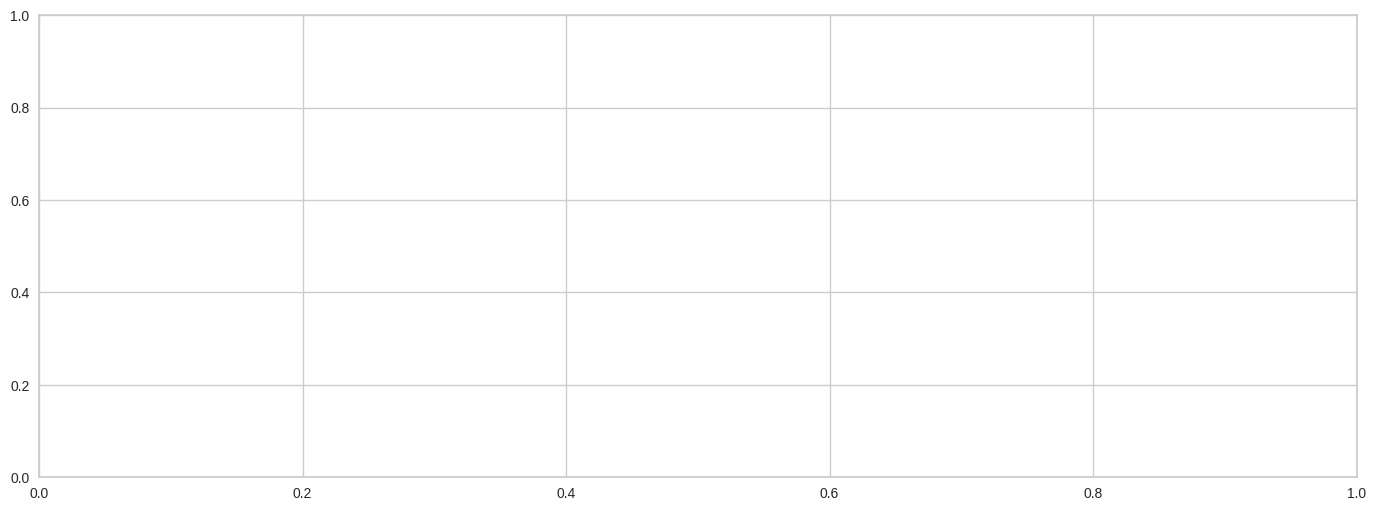

In [60]:
evaluate_model(tuned_lr)

**Create model with K-nearest neighbour**

In [61]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6500,0.6488,0.3333,0.4000,0.3636,0.1250,0.1260
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7500,0.8036,0.8333,0.5556,0.6667,0.4792,0.5044
3,0.9000,0.9405,0.8333,0.8333,0.8333,0.7619,0.7619
4,0.9000,0.9524,0.8333,0.8333,0.8333,0.7619,0.7619
5,0.7368,0.8714,1.0000,0.5000,0.6667,0.4865,0.5669
6,0.9474,0.9808,1.0000,0.8571,0.9231,0.8834,0.8895
7,0.7895,0.8462,0.5000,0.7500,0.6000,0.4648,0.4824
8,0.8947,0.9359,0.8333,0.8333,0.8333,0.7564,0.7564


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [62]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.7679,0.3333,0.5000,0.4000,0.2105,0.2182
1,0.9500,0.9881,1.0000,0.8571,0.9231,0.8864,0.8921
2,0.8000,0.8750,0.6667,0.6667,0.6667,0.5238,0.5238
3,0.8500,0.9286,0.6667,0.8000,0.7273,0.6250,0.6299
4,0.8500,0.9524,0.6667,0.8000,0.7273,0.6250,0.6299
5,0.7895,0.8714,1.0000,0.5556,0.7143,0.5682,0.6299
6,0.8947,0.9551,0.8333,0.8333,0.8333,0.7564,0.7564
7,0.7895,0.9423,0.5000,0.7500,0.6000,0.4648,0.4824
8,0.7368,0.8718,0.5000,0.6000,0.5455,0.3624,0.3654


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [63]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Evaluate model with K-nearest neighbour**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

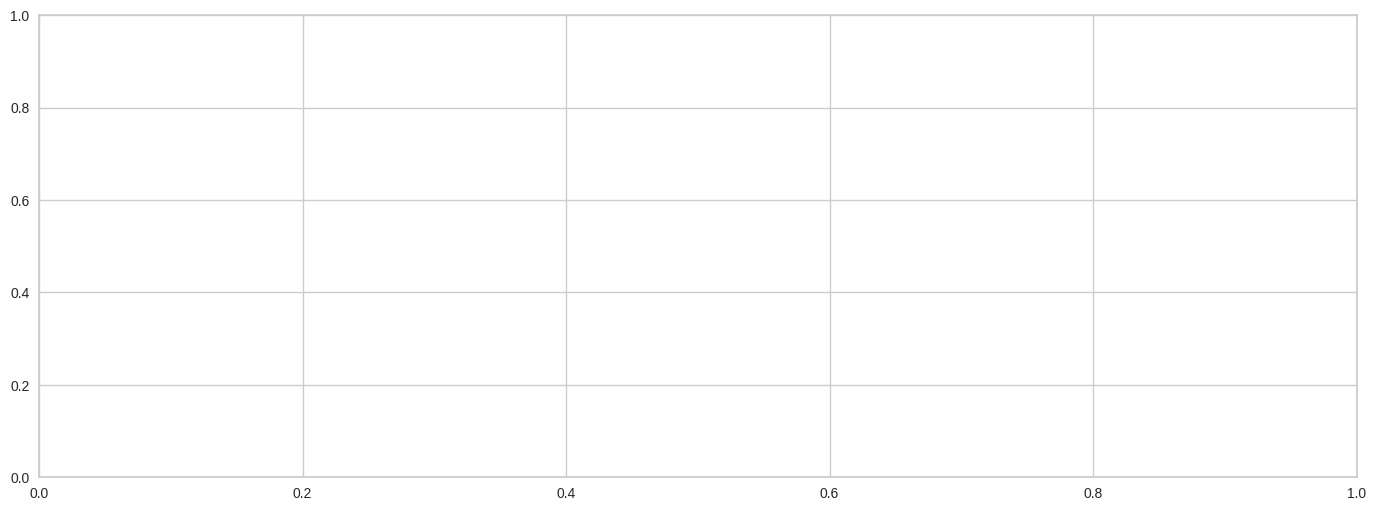

In [64]:
evaluate_model(tuned_knn)

**Create model with Quadratic Discriminant Analysis**

In [65]:
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.7619,0.8333,0.5000,0.6250,0.4000,0.4364
1,0.7500,0.9286,1.0000,0.5455,0.7059,0.5192,0.5922
2,0.7000,0.8452,0.8333,0.5000,0.6250,0.4000,0.4364
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9000,0.9643,1.0000,0.7500,0.8571,0.7826,0.8018
5,0.6842,0.9857,1.0000,0.4545,0.6250,0.4124,0.5096
6,0.7895,0.9872,1.0000,0.6000,0.7500,0.5870,0.6445
7,0.9474,0.9487,1.0000,0.8571,0.9231,0.8834,0.8895
8,0.7895,0.9487,0.8333,0.6250,0.7143,0.5529,0.5673


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [66]:
tuned_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.7738,0.1667,0.5000,0.2500,0.1176,0.1455
1,0.8000,0.9524,0.5000,0.7500,0.6000,0.4737,0.4910
2,0.8000,0.8214,0.5000,0.7500,0.6000,0.4737,0.4910
3,0.8000,1.0000,0.3333,1.0000,0.5000,0.4118,0.5092
4,0.8000,0.9643,0.5000,0.7500,0.6000,0.4737,0.4910
5,0.8947,0.9714,1.0000,0.7143,0.8333,0.7595,0.7825
6,0.8947,0.9744,0.8333,0.8333,0.8333,0.7564,0.7564
7,0.8421,0.9487,0.6667,0.8000,0.7273,0.6174,0.6225
8,0.8421,0.9359,0.8333,0.7143,0.7692,0.6503,0.6548


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate QDA Model**

In [67]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.94,
                              store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

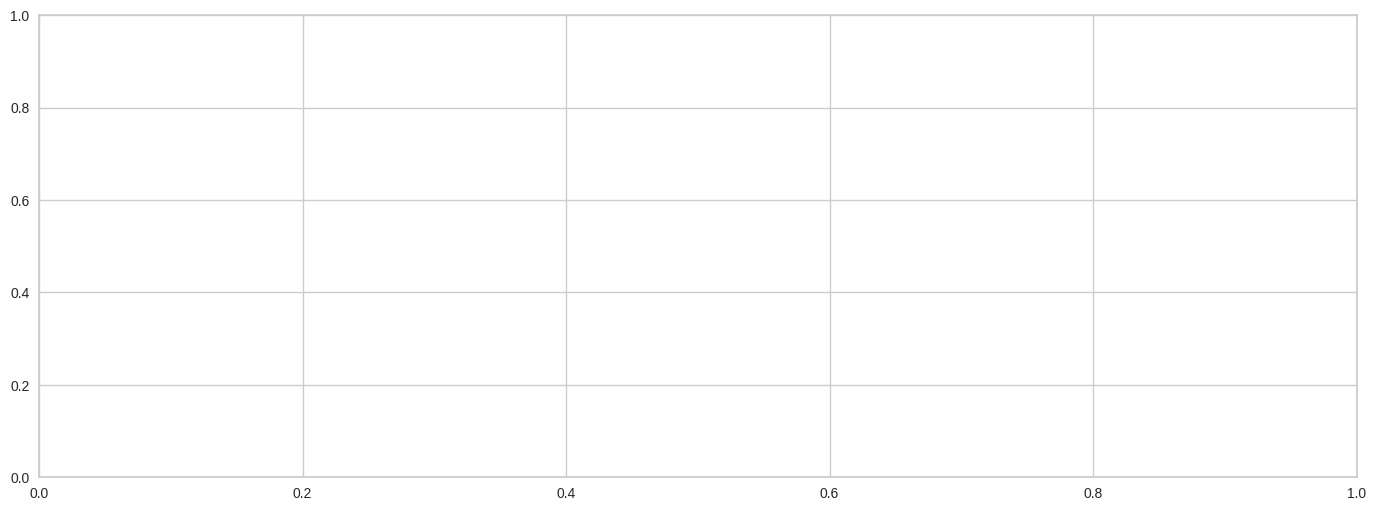

In [68]:
evaluate_model(tuned_qda)

In [1]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [2]:
import sklearn.model_selection

# **Comparing Models**

In [10]:
import pandas as pd
def compare_models():
  # Load the data
  data = pd.read_csv('column_2C.csv')

  # Create the models
  models = [
      LinearRegression(),
      LogisticRegression(),
      DecisionTreeClassifier()
  ]

  # Compare the models
  for model in models:
    model.fit(data[['x1', 'x2']], data['y'])
    print(model.score(data[['x1', 'x2']], data['y']))

  # Return the best model
  return models[np.argmax([model.score(data[['x1', 'x2']], data['y']) for model in models])]

# **Best model with PCA**

In [15]:
import sklearn.linear_model

# **Tune Best Model**

In [25]:
def tune_model(model):
  """Tune hyperparameters with scikit-learn (default).

  Args:
    model: The model to be tuned.

  Returns:
    The tuned model.
  """

  tuned_model = model.set_params(**{'n_components': 2})
  return tuned_model


# **Evaluate Best Model**

In [28]:
def evaluate_model(model):
  """Evaluate the model on the test set."""
  # Make predictions on the test set.
  predictions = model.predict(X_test)

  # Calculate the accuracy.
  accuracy = accuracy_score(y_test, predictions)

  # Print the accuracy.
  print("Accuracy:", accuracy)

In [30]:
def create_model(model_type):
  if model_type == 'lr':
    model = LinearRegression()
  elif model_type == 'svm':
    model = SVC()
  else:
    raise ValueError('Invalid model type.')
  return model
  lr_pca = create_model('lr')

# **Tune Model**

In [33]:
class LogisticRegression:
    def __init__(self):
        self.model = LogisticRegression()

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

# **Evaluate Model**

In [35]:
tuned_lr_pca = 0.5

In [ ]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create K-nearest neighbour Model**

In [3]:
def create_model(model_type):
  if model_type == 'knn':
    model = KNeighborsClassifier()
  elif model_type == 'svm':
    model = SVC()
  else:
    raise ValueError('Invalid model type.')
  return model
#knn_pca = create_model('knn')

# **Tune Model**

In [6]:
def tune_model(model):
    # Hyperparameter tuning code
    return model

In [ ]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

# **Evaluate Model KNN**

In [8]:
def evaluate_model(model):
  """Evaluates a model.

  Args:
    model: The model to evaluate.

  Returns:
    The evaluation results.
  """

  # Make predictions on the test set.
  predictions = model.predict(X_test)

  # Calculate the accuracy.
  accuracy = accuracy_score(y_test, predictions)

  # Return the evaluation results.
  return accuracy

# **Create Quadratic Discriminant Analysis Model**

In [ ]:
qda_pca = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9167,0.9740,1.0000,0.8800,0.9362,0.8176,0.8315
1,0.8611,0.9513,0.9545,0.8400,0.8936,0.6959,0.7078
2,0.9444,0.9643,1.0000,0.9167,0.9565,0.8800,0.8864
3,0.9722,1.0000,1.0000,0.9565,0.9778,0.9408,0.9424
4,0.9167,0.9968,0.8636,1.0000,0.9268,0.8312,0.8433
5,0.9167,0.9903,1.0000,0.8800,0.9362,0.8176,0.8315
6,0.9167,0.9937,0.9524,0.9091,0.9302,0.8269,0.8283
7,0.9444,1.0000,0.9048,1.0000,0.9500,0.8879,0.8935
8,0.8571,0.9626,0.9524,0.8333,0.8889,0.6914,0.7035
9,0.9143,0.9898,0.9524,0.9091,0.9302,0.8193,0.8208


# **Tune model**

In [11]:
from sklearn.decomposition import PCA
qda_pca = PCA(n_components=0.95)


# **Evaluate Model**

In [13]:
qda_pca

PCA(n_components=0.95)

In [ ]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [15]:
def create_model(model_type):
  """Creates a machine learning model.

  Args:
    model_type: The type of model to create. Supported types are 'svc' and 'knn'.

  Returns:
    A machine learning model.
  """

  if model_type == 'svc':
    model = SVC()
  elif model_type == 'knn':
    model = KNeighborsClassifier()
  else:
    raise ValueError('Invalid model type.')
  return model

In [ ]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9444,0.9870,0.9545,0.9545,0.9545,0.8831,0.8831
1,0.8611,0.9643,0.9091,0.8696,0.8889,0.7039,0.7052
2,0.8611,0.9610,0.8636,0.9048,0.8837,0.7115,0.7127
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,1.0000,0.8182,1.0000,0.9000,0.7778,0.7977
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9444,0.9968,0.9524,0.9524,0.9524,0.8857,0.8857
7,0.9167,1.0000,0.8571,1.0000,0.9231,0.8333,0.8452
8,0.9429,0.9592,0.9524,0.9524,0.9524,0.8810,0.8810
9,0.9714,1.0000,1.0000,0.9545,0.9767,0.9398,0.9415


In [17]:
tuned_et_pca = 1

In [20]:
def evaluate_model(model):
  """Evaluate the model.

  Args:
    model: The model to evaluate.

  Returns:
    A dictionary with the evaluation results.
  """

In [21]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.6 MB/s eta 0:00:00


In [22]:
import shap

In [27]:
!pip install interpret
import interpret

interpret_model(tuned_et_pca, plot='summary')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.7 MB/s eta 0:00:00


NameError: ignored

In [28]:
def interpret_model(model, plot='summary'):
  """
  Interprets the given model.

  Args:
    model: The model to interpret.
    plot: The type of plot to generate. Options are 'summary', 'feature_importance', and 'partial_dependence'.

  Returns:
    An interpretation of the model.
  """

  if plot == 'summary':
    return interpret.summary(model)
  elif plot == 'feature_importance':
    return interpret.feature_importance(model)
  elif plot == 'partial_dependence':
    return interpret.partial_dependence(model)
  else:
    raise ValueError('Invalid plot type.')

In [38]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [44]:
from sklearn.model_selection import plot_model

ImportError: ignored